In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [3]:
df = pd.read_csv('../ProjectML/US_Accidents_Dec19.csv')

In [4]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 55 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float

In [5]:
feature_lst=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

In [9]:
df_sel=df[feature_lst].copy()

In [91]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(2181408, 34)

In [11]:
state='CO'
df_state=df_sel.loc[df_sel.State==state].copy()
df_state.drop('State',axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40124 entries, 512562 to 2974134
Data columns (total 33 columns):
Source                40124 non-null object
TMC                   26927 non-null float64
Severity              40124 non-null int64
Start_Lng             40124 non-null float64
Start_Lat             40124 non-null float64
Distance(mi)          40124 non-null float64
Side                  40124 non-null object
City                  40124 non-null object
County                40124 non-null object
Timezone              40124 non-null object
Temperature(F)        39759 non-null float64
Humidity(%)           39757 non-null float64
Pressure(in)          39846 non-null float64
Visibility(mi)        39579 non-null float64
Wind_Direction        39734 non-null object
Weather_Condition     39716 non-null object
Amenity               40124 non-null bool
Bump                  40124 non-null bool
Crossing              40124 non-null bool
Give_Way              40124 non-null bool
Junct

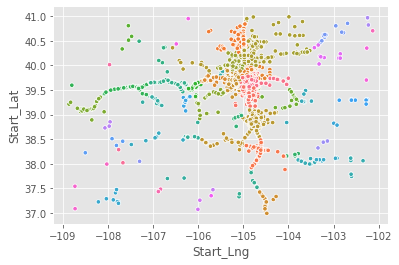

In [93]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_state, hue='County', legend=False, s=20)
plt.show()

In [94]:
county='Denver'
df_county=df_state.loc[df_state.County==county].copy()
df_county.drop('County',axis=1, inplace=True)
df_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8738 entries, 513226 to 2245701
Data columns (total 32 columns):
Source                8738 non-null object
TMC                   8738 non-null float64
Severity              8738 non-null int64
Start_Lng             8738 non-null float64
Start_Lat             8738 non-null float64
Distance(mi)          8738 non-null float64
Side                  8738 non-null object
City                  8738 non-null object
Timezone              8738 non-null object
Temperature(F)        8738 non-null float64
Humidity(%)           8738 non-null float64
Pressure(in)          8738 non-null float64
Visibility(mi)        8738 non-null float64
Wind_Direction        8738 non-null object
Weather_Condition     8738 non-null object
Amenity               8738 non-null bool
Bump                  8738 non-null bool
Crossing              8738 non-null bool
Give_Way              8738 non-null bool
Junction              8738 non-null bool
No_Exit               8738 n

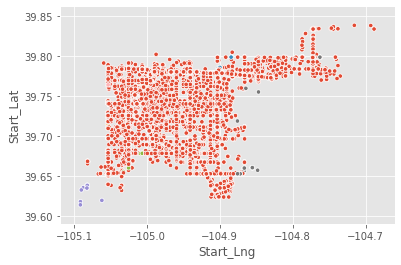

In [95]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_county, hue='City', legend=False, s=20)
plt.show()

In [96]:
df_county_dummy = pd.get_dummies(df_county,drop_first=True)
df_county_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8738 entries, 513226 to 2245701
Columns: 101 entries, TMC to Weekday_Wed
dtypes: bool(13), float64(9), int64(2), uint8(77)
memory usage: 1.5 MB


In [97]:
df=df_county_dummy
target='Severity'
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [98]:
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']
accuracy_lst=[]

In [123]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)
print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



[Logistic regression algorithm] accuracy_score: 0.828.
[[986 120   0]
 [176 462   0]
 [  1   3   0]]
              precision    recall  f1-score   support

           2       0.85      0.89      0.87      1106
           3       0.79      0.72      0.76       638
           4       0.00      0.00      0.00         4

    accuracy                           0.83      1748
   macro avg       0.55      0.54      0.54      1748
weighted avg       0.82      0.83      0.83      1748



C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [124]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)
print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[K-Nearest Neighbors (KNN)] knn.score: 0.749.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.749.
[[1013   93    0]
 [ 343  295    0]
 [   0    3    1]]
              precision    recall  f1-score   support

           2       0.75      0.92      0.82      1106
           3       0.75      0.46      0.57       638
           4       1.00      0.25      0.40         4

    accuracy                           0.75      1748
   macro avg       0.83      0.54      0.60      1748
weighted avg       0.75      0.75      0.73      1748



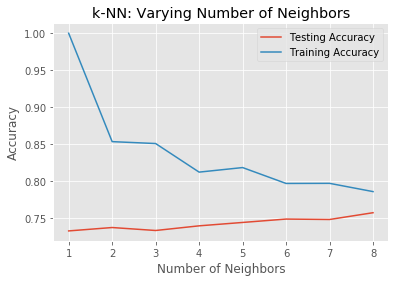

In [101]:

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, n_neighbor in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbor)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [125]:
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)
y_pred= dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred)
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)
y_pred= dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred)
acc=accuracy_gini
accuracy_lst.append(acc)
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[Decision Tree -- entropy] accuracy_score: 0.835.
[Decision Tree -- gini] accuracy_score: 0.838.
[[887 218   1]
 [ 60 577   1]
 [  1   2   1]]
              precision    recall  f1-score   support

           2       0.94      0.80      0.86      1106
           3       0.72      0.90      0.80       638
           4       0.33      0.25      0.29         4

    accuracy                           0.84      1748
   macro avg       0.66      0.65      0.65      1748
weighted avg       0.86      0.84      0.84      1748



In [126]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test, y_pred)
accuracy_lst.append(acc)
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[Randon forest algorithm] accuracy_score: 0.892.
[[1022   84    0]
 [ 100  538    0]
 [   0    4    0]]
              precision    recall  f1-score   support

           2       0.91      0.92      0.92      1106
           3       0.86      0.84      0.85       638
           4       0.00      0.00      0.00         4

    accuracy                           0.89      1748
   macro avg       0.59      0.59      0.59      1748
weighted avg       0.89      0.89      0.89      1748



C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [127]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, y_test) 
print('[Support Vector Machine algorithm] -- Accuracy:', accuracy)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[Support Vector Machine algorithm] -- Accuracy: 0.8289473684210527
[[1022   84    0]
 [ 100  538    0]
 [   0    4    0]]
              precision    recall  f1-score   support

           2       0.91      0.92      0.92      1106
           3       0.86      0.84      0.85       638
           4       0.00      0.00      0.00         4

    accuracy                           0.89      1748
   macro avg       0.59      0.59      0.59      1748
weighted avg       0.89      0.89      0.89      1748



C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [128]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
accuracy = gnb.score(X_test, y_test) 
print('[Naive Bayes algorithm] -- Accuracy:', accuracy)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[Naive Bayes algorithm] -- Accuracy: 0.6550343249427918
[[1022   84    0]
 [ 100  538    0]
 [   0    4    0]]
              precision    recall  f1-score   support

           2       0.91      0.92      0.92      1106
           3       0.86      0.84      0.85       638
           4       0.00      0.00      0.00         4

    accuracy                           0.89      1748
   macro avg       0.59      0.59      0.59      1748
weighted avg       0.89      0.89      0.89      1748



C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

